c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


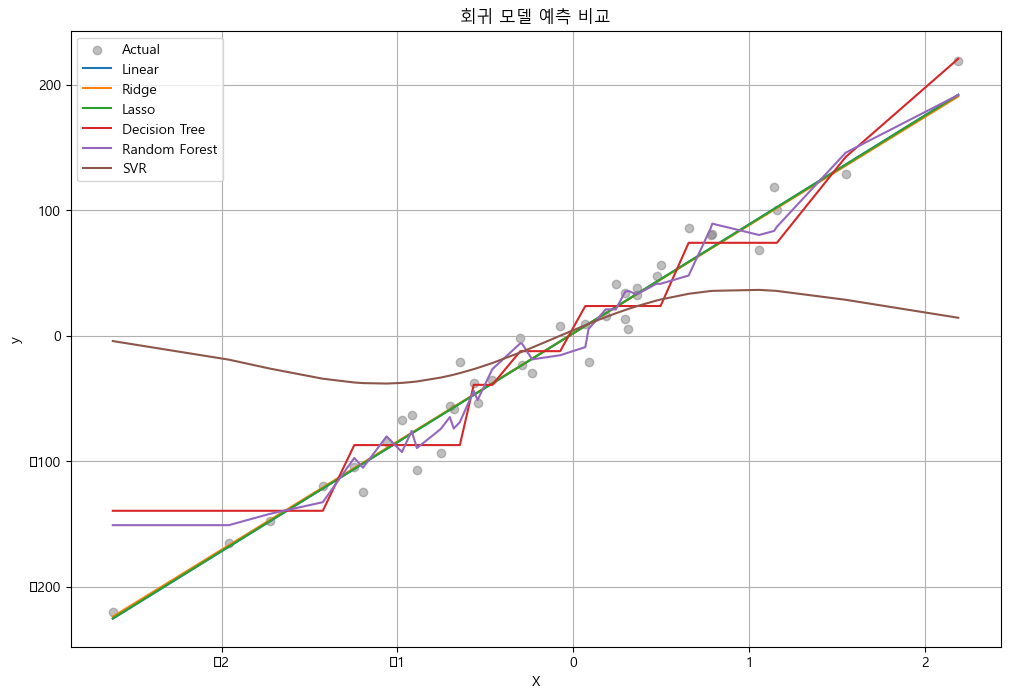

           Model          MSE        R2
0         Linear   246.121793  0.968085
2          Lasso   246.499305  0.968036
1          Ridge   248.485451  0.967779
4  Random Forest   449.112247  0.941764
3  Decision Tree   653.587642  0.915249
5            SVR  4789.737580  0.378915


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 1. 간단한 회귀용 데이터 생성
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 사용할 회귀 모델들 정의
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=3),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVR": SVR()
}

# 3. 학습 및 예측 결과 저장
results = []

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label="Actual")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'R2': r2
    })
    
    # 예측선 시각화
    sorted_idx = np.argsort(X_test[:, 0])
    plt.plot(X_test[sorted_idx], y_pred[sorted_idx], label=name)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("회귀 모델 예측 비교")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 4. 모델 성능 비교 출력
df_results = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print(df_results)
